Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Steven Suseno"

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

### Option 2 - Using Yahoo Finance `fix_yahoo_finance` library

In [2]:
## Q1 - Environment setup.
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web
import yfinance as yf
from pandas_datareader import data as pdr
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

start = datetime.datetime(2014, 11, 22)
end = datetime.datetime(2019, 11, 22)

# 1) Using pandas datareader and Yahoo Finance.
yf.pdr_override()

amzn = pdr.get_data_yahoo('AMZN', start = start)

# 2) Using fix_yahoo_finance library only to download AMZN data.

amzn = yf.download('AMZN', start=start)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
## Q2 - Adjusted close prices for FB, MMM, IBM, AMZN for the last 60 months.

all_stocks_list = ['FB', 'MMM', 'IBM', 'AMZN']

all_stocks = yf.download(all_stocks_list, start = start)

adjusted_close_prices = all_stocks["Adj Close"]

adjusted_close_prices.head(5)

[*********************100%***********************]  4 of 4 completed


,AMZN,FB,IBM,MMM
Date,,,,
2014-11-24,335.640015,74.010002,130.663605,139.695236
2014-11-25,335.040009,75.629997,130.349304,138.105026
2014-11-26,333.570007,77.620003,130.502426,138.323441
2014-11-28,338.640015,77.699997,130.679733,139.878784
2014-12-01,326.000000,75.099998,130.172043,138.192398


In [4]:
## Q3 - Resample data for end of business month, using adjusted close for each stock.

adjusted_close_prices["date"] = adjusted_close_prices.index

adjusted_close_prices["date_yearmonth"] = adjusted_close_prices["date"].dt.strftime("%Y-%m")

adjusted_close_prices_businessmonthend = pd.DataFrame({"AMZN":[], "FB":[], "IBM":[], "MMM":[], "date":[], "date_yearmonth":[]})

adjusted_close_prices_date = adjusted_close_prices.groupby("date_yearmonth")

for item in list(adjusted_close_prices_date.groups):
    adjusted_close_prices_businessmonthend = adjusted_close_prices_businessmonthend.append(adjusted_close_prices.groupby("date_yearmonth").get_group(item).last('1D'))

adjusted_close_prices_businessmonthend_past60 = adjusted_close_prices_businessmonthend[:-1]

adjusted_close_prices_businessmonthend_past60.tail(5)  
    

C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,AMZN,FB,IBM,MMM,date,date_yearmonth
2019-06-28,1893.630005,193.000000,134.703110,170.293930,2019-06-28,2019-06
2019-07-31,1866.780029,194.229996,144.803421,171.649689,2019-07-31,2019-07
2019-08-30,1776.290039,185.669998,133.947937,160.331924,2019-08-30,2019-08
2019-09-30,1735.910034,178.080002,143.722488,162.988922,2019-09-30,2019-09
2019-10-31,1776.660034,191.649994,132.168945,163.573868,2019-10-31,2019-10


In [5]:
## Check if there is any nulls on resampled dataset above.

adjusted_close_prices_businessmonthend_past60.isnull().values.any()

False

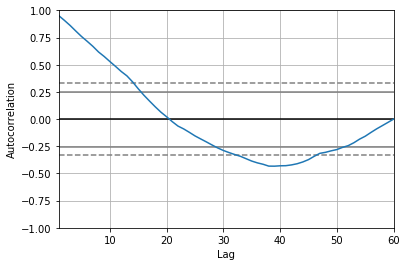

In [6]:
## Q4 - Autocorrelation of adjusted month-end close prices for AMZN.

## AMZN is autocorrelated. 
## The plot shows that the adjusted month-end close price was positive in the first 30 month-end, 
## then went to negative before approaching 0 on week 60.

autocorrelation_plot(adjusted_close_prices_businessmonthend_past60["AMZN"])

plt.show()

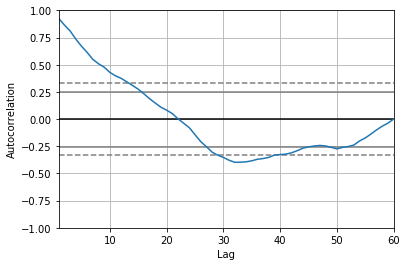

In [7]:
## Q4 - Autocorrelation of adjusted month-end close prices for FB.

## FB is autocorrelated. 
## The plot shows that the adjusted month-end close price was positive in the first 20s month-end,
## then went to negative before approaching 0 on week 60

autocorrelation_plot(adjusted_close_prices_businessmonthend_past60["FB"])

plt.show()

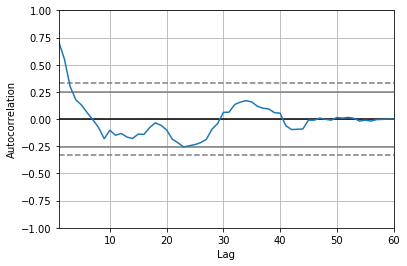

In [8]:
## Q4 - Autocorrelation of adjusted month-end close prices for IBM

## IBM is relatively NOT autocorrelated. 
## The plot shows that the adjusted month-end close price went down to around 0 prior to week 10,
## and stays around 0 for the rest of month-end period until week 60.

autocorrelation_plot(adjusted_close_prices_businessmonthend_past60["IBM"])

plt.show()

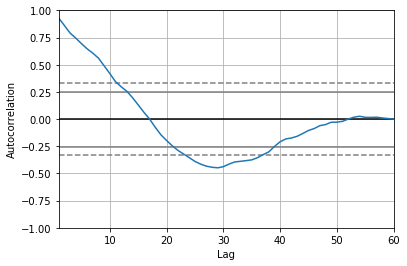

In [9]:
## Q4 - Autocorrelation of adjusted month-end close prices for MMM.

## MMM is autocorrelated.
## The plot shows that the adjusted month-end close price was positive prior to week 20,
## then went to negative before approaching 0 on week 50.

autocorrelation_plot(adjusted_close_prices_businessmonthend_past60["MMM"])

plt.show()

In [10]:
## Q5 - Calculate monthly returns for each stock.

adjusted_close_prices_businessmonthend_past60.shift(0, axis=1)

adjusted_close_prices_businessmonthend_past60["AMZN_prev"] = adjusted_close_prices_businessmonthend_past60["AMZN"].shift(1)
adjusted_close_prices_businessmonthend_past60["FB_prev"] = adjusted_close_prices_businessmonthend_past60["FB"].shift(1)
adjusted_close_prices_businessmonthend_past60["IBM_prev"] = adjusted_close_prices_businessmonthend_past60["IBM"].shift(1)
adjusted_close_prices_businessmonthend_past60["MMM_prev"] = adjusted_close_prices_businessmonthend_past60["MMM"].shift(1)

adjusted_close_prices_businessmonthend_past60["AMZN_return"] = (adjusted_close_prices_businessmonthend_past60["AMZN"]/adjusted_close_prices_businessmonthend_past60["AMZN_prev"])-1
adjusted_close_prices_businessmonthend_past60["FB_return"] = (adjusted_close_prices_businessmonthend_past60["FB"]/adjusted_close_prices_businessmonthend_past60["FB_prev"])-1
adjusted_close_prices_businessmonthend_past60["IBM_return"] = (adjusted_close_prices_businessmonthend_past60["IBM"]/adjusted_close_prices_businessmonthend_past60["IBM_prev"])-1
adjusted_close_prices_businessmonthend_past60["MMM_return"] = (adjusted_close_prices_businessmonthend_past60["MMM"]/adjusted_close_prices_businessmonthend_past60["MMM_prev"])-1

adjusted_close_prices_businessmonthend_past60.tail(5)


C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

,AMZN,FB,IBM,MMM,date,date_yearmonth,AMZN_prev,FB_prev,IBM_prev,MMM_prev,AMZN_return,FB_return,IBM_return,MMM_return
2019-06-28,1893.630005,193.000000,134.703110,170.293930,2019-06-28,2019-06,1775.069946,177.470001,124.046028,156.942749,0.066792,0.087508,0.085912,0.085070
2019-07-31,1866.780029,194.229996,144.803421,171.649689,2019-07-31,2019-07,1893.630005,193.000000,134.703110,170.293930,-0.014179,0.006373,0.074982,0.007961
2019-08-30,1776.290039,185.669998,133.947937,160.331924,2019-08-30,2019-08,1866.780029,194.229996,144.803421,171.649689,-0.048474,-0.044071,-0.074967,-0.065935
2019-09-30,1735.910034,178.080002,143.722488,162.988922,2019-09-30,2019-09,1776.290039,185.669998,133.947937,160.331924,-0.022733,-0.040879,0.072973,0.016572
2019-10-31,1776.660034,191.649994,132.168945,163.573868,2019-10-31,2019-10,1735.910034,178.080002,143.722488,162.988922,0.023475,0.076202,-0.080388,0.003589


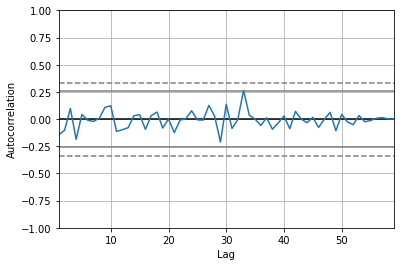

In [11]:
## Q5 - Autocorrelation for AMZN's monthly returns.

## AMZN's monthly returns is NOT autocorrelated.
## The autocorrelation plot stays at around 0 over the 60 month-end period.

autocorrelation_plot(adjusted_close_prices_businessmonthend_past60[1:]["AMZN_return"])

plt.show()

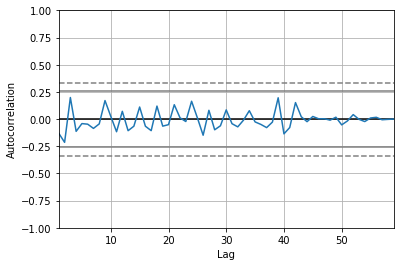

In [12]:
## Q5 - Autocorrelation for FB's monthly returns.

## FB's monthly returns is NOT autocorrelated.
## The autocorrelation plot stays at around 0 over the 60 month-end period.

autocorrelation_plot(adjusted_close_prices_businessmonthend_past60[1:]["FB_return"])

plt.show()


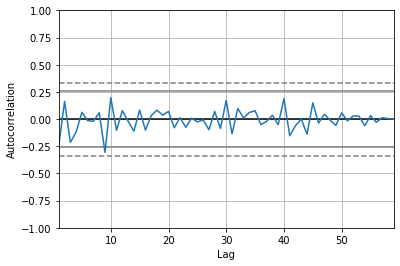

In [13]:
## Q5 - Autocorrelation for IBM's monthly returns.

## IBM's monthly returns is NOT autocorrelated.
## The autocorrelation plot stays at around 0 over the 60 month-end period.

autocorrelation_plot(adjusted_close_prices_businessmonthend_past60[1:]["IBM_return"])

plt.show()

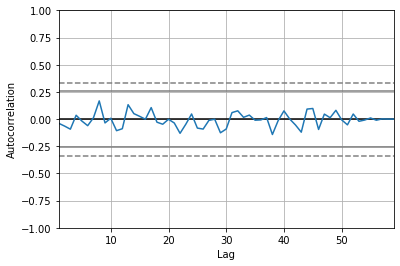

In [14]:
## Q5 - Autocorrelation for MMM's monthly returns.

## MMM's monthly returns is NOT autocorrelated.
## The autocorrelation plot stays at around 0 over the 60 month-end period.

autocorrelation_plot(adjusted_close_prices_businessmonthend_past60[1:]["MMM_return"])

plt.show()

In [15]:
## Q6 - Combine all 4 time series (returns) into a single DataFrame

final_dataset = adjusted_close_prices_businessmonthend_past60[["AMZN_return", "FB_return", "IBM_return", "MMM_return"]]

final_dataset.tail(5)

,AMZN_return,FB_return,IBM_return,MMM_return
2019-06-28,0.066792,0.087508,0.085912,0.085070
2019-07-31,-0.014179,0.006373,0.074982,0.007961
2019-08-30,-0.048474,-0.044071,-0.074967,-0.065935
2019-09-30,-0.022733,-0.040879,0.072973,0.016572
2019-10-31,0.023475,0.076202,-0.080388,0.003589


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1891C4F28>,
      dtype=object)

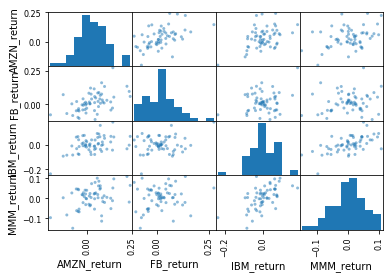

In [16]:
## Q6 - Scatter plot matrix to visualize correlation between the returns of all pairs of stocks.

scatter_matrix(final_dataset)

In [17]:
## Q6 - Any correlations between the returns of all pairs of stocks?

## AMZN & FB - positive correlation

## AMZN & IBM - no/weak correlation

## AMZN & MMM - no/weak correlation

## FB & IBM - no/weak correlation

## FB & MMM - no/weak correlation

## IBM & MMM - positive correlation